In [37]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing


import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [38]:
#Lecture des données
data = pd.read_excel("/home/congo/Bureau/2022-m1-staps/data_motives/data_motives_final.xlsx","haller",) 

In [39]:
# mise a zero des valeurs manquantes
data = data.fillna(0)

#stoker le nom des colonnes
column_name = [c for c in data]

In [40]:
data = data.to_numpy()
data = data[:,39:]
nlin ,ncol =data.shape
print('data' ,data.shape)

data (1075, 71)


##                            Preprosseccing

In [41]:
# rendre toute les valeurs positives
data_correct = data
data = np.absolute(data)

In [42]:
#Supression des valeurs abérantes par rapport au seuil
seuil = 5*np.std(data,axis=0,dtype = np.float64)
#print(seuil)
data = np.array(data)
data_tmp = np.zeros_like(data)
data_tmp[data < seuil] = data[data < seuil]
data = data_tmp
#print(data)

In [43]:
#normalisation par ligne (avec ecartype nul) our avoir des valeurs entre 0 et 1

#indices à suprimer
max = np.max(data,axis = 1)
indices = [i for i, e in enumerate(max) if e == 0]
#print(indices)

#suppression des lignes
data_del = np.delete(data,indices,axis = 0)
data = data_del

#normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
min = np.min(data,axis = 1)
max = np.max(data,axis = 1)
data = (data-min[:,np.newaxis])/max[:,np.newaxis]

#print(data)


In [44]:
import pandas as pd
import openpyxl

In [45]:
# retour des valeurs négatives

#suppression des lignes
data_del = np.delete(data_correct,indices,axis = 0)
data_correct = data_del

#print("data before = ", data[data < 0])

#indices des valeurs négatives
indices_val_neg_i = np.where(data_correct < 0)
#print("indices_val_neg_i = ",indices_val_neg_i)

data[indices_val_neg_i] = -1*data[indices_val_neg_i]


#print("data after = ", data[data < 0] )
nlin ,ncol =data.shape



 Cluster Algorithm 

## 1) CAH algorithm 

In [46]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 


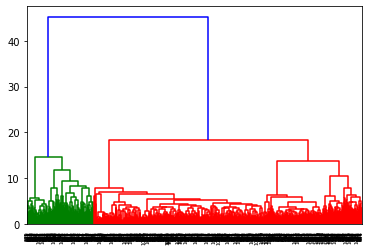

In [47]:
#create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))

In [48]:
hc = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean',linkage='ward' )


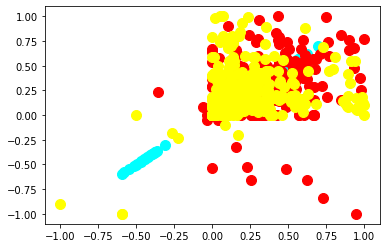

In [49]:
y_hc = hc.fit_predict(data)
plt.scatter(data[y_hc == 0,28],data[ y_hc == 0,28],s= 100,c = 'cyan')
plt.scatter(data[y_hc == 1,0],data[ y_hc == 1,1],s= 100,c = 'red')
plt.scatter(data[y_hc == 2,0],data[ y_hc == 2,1],s= 100,c = 'yellow')
plt.scatter(data[y_hc == 3,0],data[ y_hc == 3,1],s= 100,c = 'black')
plt.scatter(data[y_hc == 4,0],data[ y_hc == 4,1],s= 100,c = 'green')
plt.scatter(data[y_hc == 5,0],data[ y_hc == 5,1],s= 100,c = 'green')


## K-means

In [50]:
from sklearn.cluster import KMeans


Text(0, 0.5, ' Cout du modele inertia')

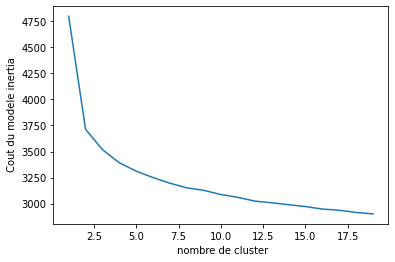

In [51]:
#nombre de cluster optimal 
# inertia calcule le cout (somme des distance entre les points d'un cluster et du centroide )
# methode shadow aur=tre indicateur
inertia =[]
K_range =range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(data)
    inertia.append(model.inertia_)


plt.plot(K_range,inertia)
plt.xlabel(" nombre de cluster")
plt.ylabel(" Cout du modele inertia")


# 2-6 clusters ? la zone de "coude"

Text(0.5, 0, " nombre d'étudiant")

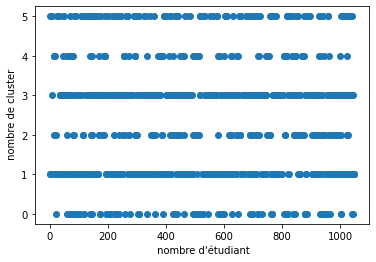

In [52]:
x_etudiant=range(0,nlin)

n_cluster = 6
model = KMeans(n_clusters= n_cluster)
y_pred = model.fit_predict(data)

plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

##                            Statistique Inférentielle sur chaque cluster 1

In [53]:
# mettre data en df
df_cluster = pd.DataFrame(data)

df_cluster_const = df_cluster.astype(float,errors='raise')
# renommer les colonne
df_cluster.columns = column_name[39:]
df_cluster_const.columns = column_name[39:]
#print(df_cluster.shape)

# # création d'une colonne cluster 
df_cluster['cluster'] = y_pred
# #print(df_cluster.shape)

In [54]:
# df_cluster.groupby('cluster').describe()

In [55]:

y_pred_0 = np.zeros(len(y_pred), dtype= int)
y_pred_1 = np.zeros(len(y_pred), dtype= int)
y_pred_2 = np.zeros(len(y_pred), dtype= int)
y_pred_3 = np.zeros(len(y_pred), dtype= int)
y_pred_4 = np.zeros(len(y_pred), dtype= int)
y_pred_5 = np.zeros(len(y_pred), dtype= int)

# print(y_pred[ y_pred == 5])

for i in range (len(y_pred)) :
    if ( y_pred[i] == 0) :
        y_pred_0[i] = 1 
    if ( y_pred[i] == 1) :
        y_pred_1[i] = 1 

    if ( y_pred[i] == 2) :
        y_pred_2[i] = 1 

    if ( y_pred[i] == 3) :
        y_pred_3[i] = 1 

    if ( y_pred[i] == 4) :
        y_pred_4[i] = 1 

    if ( y_pred[i] == 5) :
        y_pred_5[i] = 1
             
        
# print(y_pred_5[y_pred_5 == 1])

# # création d'une colonne cluster0 ,1 ,2  
df_cluster['cluster_0'] = y_pred_0
df_cluster['cluster_1'] = y_pred_1
df_cluster['cluster_2'] = y_pred_2
df_cluster['cluster_3'] = y_pred_3
df_cluster['cluster_4'] = y_pred_4
df_cluster['cluster_5'] = y_pred_5

# print(df_cluster.shape)


In [56]:
# 'Confiance en soi' par 'Confiance_en_soi'
# print(column_name[90])
column_name[90] = 'Confiance_en_soi'
# print(column_name[90])
df_cluster = df_cluster.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

# print(df_cluster['Confiance_en_soi'])

In [57]:
# df_cluster.info()
# probleme de type alors on le change
df_cluster = df_cluster.astype(float,errors='raise')
# df_cluster.info()

renommer les lignes ( remplacer 0 par etudiant0)

In [58]:
line_name = ['etudiant' + str(i) for i in range(nlin)]
# print(line_name)
df_cluster.index = line_name
df_cluster_const.index = line_name
# print(df_cluster)

In [59]:
with pd.ExcelWriter('test.xlsx') as writer:
    df_cluster.to_excel(writer, freeze_panes=(1,1))

In [60]:
# Çağatay Demiralp <cagatay@cs.stanford.edu>

In [61]:
import statsmodels.formula.api as smf


In [62]:
# "cluster_0 ~ detente + Confort + .... "

List_qualif = column_name[39:]
chaine = "cluster_0 ~ "
for qualif in List_qualif : # pour chaque qualité 
    chaine += '+'
    chaine +=  str(qualif) 

# print(chaine)

In [63]:

model = smf.ols(chaine, data=df_cluster).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              cluster_0   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     10.95
Date:                Fri, 13 May 2022   Prob (F-statistic):           4.55e-83
Time:                        17:49:15   Log-Likelihood:                 192.81
No. Observations:                1050   AIC:                            -241.6
Df Residuals:                     978   BIC:                             115.3
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1156      0.017  

## OLS with dummy variables

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [65]:
# rendre y_pred_0 en dummy variables ???

dummy = pd.get_dummies(y_pred).values
# print(dummy)

cluster 0

In [66]:

model = sm.OLS(y_pred_0, df_cluster_const)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.464
Model:                            OLS   Adj. R-squared (uncentered):              0.425
Method:                 Least Squares   F-statistic:                              11.94
Date:                Fri, 13 May 2022   Prob (F-statistic):                    1.06e-90
Time:                        17:49:16   Log-Likelihood:                          169.86
No. Observations:                1050   AIC:                                     -197.7
Df Residuals:                     979   BIC:                                      154.2
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [67]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Galbant       -0.173059
Cardio        -0.151884
Douceur       -0.125543
Rapide        -0.117791
Bien_etre     -0.110168
                 ...   
Liberte        0.141106
Technicite     0.157583
Energie        0.168411
Se_defouler    0.185582
Intensite      0.190587
Length: 71, dtype: float64


In [68]:
print("R2: ", results.rsquared)

R2:  0.4640472317331896


In [69]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.019852
Role              0.022099
Individualiste    0.022846
detente           0.024643
Galbant           0.025180
                    ...   
Se_defouler       0.048894
Puissance         0.050820
Muscle            0.050974
Energie           0.052358
Competition       0.054605
Length: 71, dtype: float64


cluster 1

In [70]:
model = sm.OLS(y_pred_1, df_cluster_const)
results = model.fit()
# print(results.summary())


In [71]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Muscle        -0.200288
Inconfort     -0.170144
Technicite    -0.155640
Performance   -0.148573
Douceur       -0.148017
                 ...   
Energie        0.161419
Difficulte     0.178493
Confort        0.280515
Force          0.404668
Galbant        0.440213
Length: 71, dtype: float64


In [72]:
print("R2: ", results.rsquared)

R2:  0.1948445385370473


In [73]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.044611
Role              0.049661
Individualiste    0.051340
detente           0.055378
Galbant           0.056584
                    ...   
Se_defouler       0.109875
Puissance         0.114202
Muscle            0.114549
Energie           0.117659
Competition       0.122708
Length: 71, dtype: float64


cluster 2

In [74]:

model = sm.OLS(y_pred_2, df_cluster_const)
results = model.fit()
# print(results.summary())


In [75]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Lassitude        -0.104312
Ennuyeux         -0.094887
Securite         -0.091645
Confort          -0.078454
Fatigue          -0.077607
                    ...   
Serenite          0.100596
Accompagnement    0.103277
Muscultation      0.123254
Vital             0.147985
Role              0.172097
Length: 71, dtype: float64


In [76]:
print("R2: ", results.rsquared)

R2:  0.7551976769615474


In [77]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.015793
Role              0.017581
Individualiste    0.018175
detente           0.019604
Galbant           0.020031
                    ...   
Se_defouler       0.038897
Puissance         0.040429
Muscle            0.040551
Energie           0.041652
Competition       0.043440
Length: 71, dtype: float64


cluster 3

In [78]:

model = sm.OLS(y_pred_3, df_cluster_const)
results = model.fit()
# print(results.summary())


In [79]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Energie            -0.348405
Endurance          -0.289109
Rythme             -0.168325
Transpiration      -0.161078
Confiance en soi   -0.131862
                      ...   
Legerete            0.202623
Culpabilite         0.208921
Lent                0.214203
Decouragement       0.246750
Douceur             0.284697
Length: 71, dtype: float64


In [80]:
print("R2: ", results.rsquared)

R2:  0.5368012563847044


In [81]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.038542
Role              0.042906
Individualiste    0.044356
detente           0.047845
Galbant           0.048886
                    ...   
Se_defouler       0.094928
Puissance         0.098667
Muscle            0.098966
Energie           0.101654
Competition       0.106016
Length: 71, dtype: float64


cluster 4

In [82]:

model = sm.OLS(y_pred_4, df_cluster_const)
results = model.fit()
# print(results.summary())


In [83]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Role             -0.206001
Vital            -0.133516
Accompagnement   -0.131700
Facilite         -0.107071
Muscle           -0.105347
                    ...   
Progression       0.102923
Performance       0.117114
Plaisir           0.136768
Efficacite        0.141978
Cardio            0.167603
Length: 71, dtype: float64


In [84]:
print("R2: ", results.rsquared)

R2:  0.6085637053659643


In [85]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.017169
Role              0.019112
Individualiste    0.019758
detente           0.021313
Galbant           0.021777
                    ...   
Se_defouler       0.042286
Puissance         0.043951
Muscle            0.044085
Energie           0.045282
Competition       0.047225
Length: 71, dtype: float64


cluster 5

In [86]:

model = sm.OLS(y_pred_5, df_cluster_const)
results = model.fit()
# print(results.summary())


In [87]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Challenge       -0.076814
Equilibre       -0.075134
Impact          -0.071404
Depassement     -0.070859
Acceleration    -0.059588
                   ...   
Energie          0.122228
Securite         0.134931
Transpiration    0.139493
Endurance        0.239952
Competition      0.259605
Length: 71, dtype: float64


In [88]:
print("R2: ", results.rsquared)

R2:  0.4307375278254667


In [89]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.025208
Role              0.028062
Individualiste    0.029010
detente           0.031292
Galbant           0.031974
                    ...   
Se_defouler       0.062087
Puissance         0.064532
Muscle            0.064728
Energie           0.066485
Competition       0.069338
Length: 71, dtype: float64


##                            Statistique Inférentielle sur chaque cluster 2

Fval et pval

In [90]:
# quels qualif influence le plus le partitionnement
from sklearn.feature_selection import f_classif
F,pval = f_classif(df_cluster,y_pred)
df_List_qualif = df_cluster.columns

df_pval_and_qualif = pd.DataFrame(pval,index = df_List_qualif,columns= ['pval'])
# print(df_pval_and_qualif)

#trier des valeurs 
df_pval_and_qualif = df_pval_and_qualif.sort_values(by = 'pval')

# print(df_pval_and_qualif[15])



/home/congo/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [91]:
# es -ce ca la bonne question : comment evolue les clusters par rapports au qualificatif ??

# on cherche a analyser l'influence des qualifiquatif sur chaque cluster

In [92]:
# plt.scatter(df_cluster.loc[:,'Galbant'],df_cluster.loc[:,'Stretchcing'],c=df_cluster.loc[:,'cluster'])


In [93]:
# "cluster ~ detente + Confort + .... "

List_qualif = column_name[39:]
chaine = "cluster ~ "
for qualif in List_qualif : # pour chaque qualité 
    chaine += '+'
    chaine +=  str(qualif) 
    model = ols(chaine, data=df_cluster).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
# print(aov_table)



In [94]:
# "cluster ~ detente "  et conservation de pval <  0.05

List_pval_and_qualif = []
List_pval = []
df_List_qualif = []
List_qualif = column_name[39:]
chaine = ''
for qualif in List_qualif : # pour chaque qualité 
    chaine = "cluster ~ "
    chaine +=  str(qualif)
    model = ols(chaine, data=df_cluster).fit()
    chaine = ''
    aov_table = sm.stats.anova_lm(model, typ=3)
    # aov_table = aov_table.to_numpy()
    pval = aov_table.loc[str(qualif),'PR(>F)']
    if pval < 0.05:
        List_pval.append(pval)
        df_List_qualif.append(qualif)
        


# on affiche les qualif qui influence le plus le cluster   

df_pval_and_qualif = pd.DataFrame(List_pval,index = df_List_qualif,columns= ['pval'])
# print(df_pval_and_qualif.sort_values(by = 'pval'))


# les variables les moins important
#print(len(df_List_qualif), len(List_qualif))

# print(set(List_qualif) - set(df_List_qualif))

In [95]:
chaine = "cluster ~ Confort"

model = ols(chaine, data=df_cluster).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
print(aov_table.shape)
print(aov_table)
aov_table = aov_table.to_numpy()
print(aov_table[1,3])

(3, 4)
                sum_sq      df            F         PR(>F)
Intercept  3243.348214     1.0  1571.634460  1.031604e-210
Confort      78.336381     1.0    37.959586   1.028258e-09
Residual   2162.735047  1048.0          NaN            NaN
1.028257966210648e-09


In [96]:
# utilision uniquement les centres des clusters ici !!!
center_cluster_0 = model.cluster_centers_[0,:]  
center_cluster_1 = model.cluster_centers_[1,:]
center_cluster_2 = model.cluster_centers_[2,:]
center_cluster_3 = model.cluster_centers_[3,:]
center_cluster_4 = model.cluster_centers_[4,:]
center_cluster_5 = model.cluster_centers_[5,:]
df_cluster_center = np.zeros([n_cluster,ncol])

df_cluster_center[0,:] = center_cluster_0
df_cluster_center[1,:] = center_cluster_1
df_cluster_center[2,:] = center_cluster_2
df_cluster_center[3,:] = center_cluster_3
df_cluster_center[4,:] = center_cluster_4
df_cluster_center[5,:] = center_cluster_5

def_cluster_center_modif = df_cluster_center[np.where((df_cluster_center < -0.5) | (df_cluster_center > 0.5) )]

# matrice = np.array(df_cluster_center)
# im1 = plt.matshow(matrice)
# plt.colorbar(im1)
# plt.show



AttributeError: 'OLSResults' object has no attribute 'cluster_centers_'

In [ ]:
# regresion logistic

In [98]:
# "cluster ~ detente "  et conservation de pval <  0.05

List_pval_and_qualif = []
List_pval = []
df_List_qualif = []
List_qualif = column_name[39:]
chaine = ''
for qualif in List_qualif : # pour chaque qualité 
    chaine = "cluster ~ "
    chaine +=  str(qualif)
    chaine = ''
    model = smf.logit(chaine, data = df_cluster).fit()
    # aov_table = aov_table.to_numpy()
    pval = model.loc[str(qualif),'PR(>F)']
    if pval < 0.05:
        List_pval.append(pval)
        df_List_qualif.append(qualif)
        


# on affiche les qualif qui influence le plus le cluster   

df_pval_and_qualif = pd.DataFrame(List_pval,index = df_List_qualif,columns= ['pval'])
# print(df_pval_and_qualif.sort_values(by = 'pval'))


# les variables les moins important
#print(len(df_List_qualif), len(List_qualif))

# print(set(List_qualif) - set(df_List_qualif))

PatsyError: model is missing required outcome variables

##   autres

In [ ]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

#statistique inférentielle sur chaque cluster 

# faire pour chaque cluster une statistique inférentielle 

# les mots qui caractérise les clusters

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0.sort_values(ascending=False))


Galbant         77.597964
Stretchcing     56.566502
Confort         51.230303
Plaisir         49.113195
Repetition      48.192301
                  ...    
Puissance        28.02486
Facilite        27.835805
Endurance       27.308292
Acceleration    26.996998
Rapide          23.132263
Length: 71, dtype: object


In [ ]:
#cluster 1
indices_cluster_1 = np.where(data[y_pred == 1])
cluster_1 = data[y_pred == 1]

# retour du df
df_1 = pd.DataFrame(cluster_1)
# prendre la valeur absolute pour éviter la compensation
df_1 = np.absolute(df_1)
df_1.columns = column_name[39:]
#print(df_1)

# trier par somme de toutes les colonnes
sum_colonne_1 = df_1.sum()
print(sum_colonne_1.sort_values(ascending=False))

Galbant           119.751873
Repetition        103.062749
Ralentissement     95.217556
Stretchcing        95.185472
Decouragement      90.629534
                     ...    
Muscultation       45.438831
Meilleur           44.530772
Cardio             44.392387
Rapide             38.159449
Energie            37.791284
Length: 71, dtype: object


In [ ]:
#cluster 2
indices_cluster_2 = np.where(data[y_pred == 2])
cluster_2 = data[y_pred == 2]

# retour du df
df_2 = pd.DataFrame(cluster_2)
# prendre la valeur absolute pour éviter la compensation
df_2 = np.absolute(df_2)
df_2.columns = column_name[39:]
#print(df_2)

# trier par somme de toutes les colonnes
sum_colonne_2 = df_2.sum()
print(sum_colonne_2.sort_values(ascending=False))

Performance     56.54923
Plaisir        47.258072
Efficacite     47.111768
Depassement    46.713913
Cardio         46.489021
                 ...    
Beaute          3.015553
Douceur         2.721342
Securite        2.592479
Confort         1.676983
Ennuyeux             0.0
Length: 71, dtype: object


In [ ]:
#cluster 3
indices_cluster_3 = np.where(data[y_pred == 3])
cluster_3 = data[y_pred == 3]

# retour du df
df_3 = pd.DataFrame(cluster_3)
# prendre la valeur absolute pour éviter la compensation
df_3 = np.absolute(df_3)
df_3.columns = column_name[39:]
#print(df_3)

# trier par somme de toutes les colonnes
sum_colonne_3 = df_3.sum()
print(sum_colonne_3.sort_values(ascending=False))

Performance    88.980946
Partage        83.156963
Meilleur       82.966066
Plaisir        82.666313
Groupe         79.412279
                 ...    
Force           6.992334
Qualite         6.276778
Ennuyeux        4.405572
Securite        3.421003
Confort         2.814457
Length: 71, dtype: object


In [ ]:
#cluster 4
indices_cluster_4 = np.where(data[y_pred == 4])
cluster_4 = data[y_pred == 4]

# retour du df
df_4 = pd.DataFrame(cluster_4)
# prendre la valeur absolute pour éviter la compensation
df_4 = np.absolute(df_4)
df_4.columns = column_name[39:]
#print(df_4)

# trier par somme de toutes les colonnes
sum_colonne_4 = df_4.sum()
print(sum_colonne_4.sort_values(ascending=False))

detente      53.650181
Plaisir      49.751437
Partage      46.450876
Serenite     44.842832
Calme        44.226381
               ...    
Beaute        2.637775
Securite      2.520003
Confort       2.130858
Inconfort     2.113536
Ennuyeux      0.150181
Length: 71, dtype: object


In [ ]:
#cluster 5
indices_cluster_5 = np.where(data[y_pred == 5])
cluster_5 = data[y_pred == 5]

# retour du df
df_5 = pd.DataFrame(cluster_5)
# prendre la valeur absolute pour éviter la compensation
df_5 = np.absolute(df_5)
df_5.columns = column_name[39:]
#print(df_5)

# trier par somme de toutes les colonnes
sum_colonne_5 = df_5.sum()
print(sum_colonne_5.sort_values(ascending=False))

Objectif        52.122468
Perseverance    51.774973
Confort         50.687706
Plaisir         50.038861
Repetition      49.221591
                  ...    
Lent            25.405633
Sexy            21.990975
Lassitude       21.523985
Culpabilite     21.160573
Ennuyeux        20.867014
Length: 71, dtype: object


##                            fuzzy cluster

In [ ]:
from fcmeans import FCM


In [ ]:
n_cluster = 4
fcm = FCM(n_clusters= n_cluster)
# faire ça pour eviter les problemes de shape !!!
data = np.array(data, dtype=np.float64)
fcm.fit(data)

##expliquations :
# data = np.array(data)
#print(data.dtype)
#print(data.shape)
#arr = np.ones([1050,71])
#print(arr.shape)
#fcm.fit(data)

Text(0.5, 0, " nombre d'étudiant")

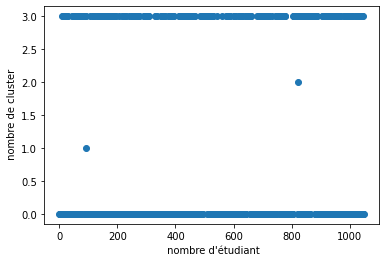

In [ ]:
# outputs 
y_pred_centers = fcm.centers
y_pred = fcm.predict(data)


plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

uniquement le centre des clusters !!!

In [ ]:
#cluster 0
print(y_pred_centers.shape)
cluster_0 = y_pred_centers[0,:]
print(cluster_0)
# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
# ajouter les noms des colonnes
df_0.columns = column_name[39:]


#print(df_0)

# trier les valeurs

print(df_0)


(4, 71)
[0.17146673 0.15996633 0.14508351 0.1418201  0.15838276 0.1265604
 0.12999283 0.12799452 0.12603176 0.18454017 0.1618625  0.12946863
 0.1764391  0.14828819 0.16009047 0.16519649 0.15341658 0.16575386
 0.18136483 0.16248493 0.17251205 0.13458682 0.21878883 0.19150754
 0.15140002 0.16220129 0.19201341 0.1732566  0.16489977 0.20818946
 0.17302555 0.15255531 0.23883292 0.23081507 0.11059567 0.15629002
 0.21315589 0.21278937 0.21061676 0.22730004 0.15696018 0.1453119
 0.18755233 0.11111754 0.24039486 0.22340762 0.11555888 0.25846128
 0.26685724 0.21136576 0.10907658 0.26485507 0.25662859 0.15810709
 0.28772398 0.23951287 0.20052962 0.24346573 0.21859447 0.2581123
 0.2044959  0.2343847  0.15720523 0.32196902 0.28161739 0.25740716
 0.18295376 0.28080638 0.23474059 0.20938507 0.25493839]


ValueError: Length mismatch: Expected axis has 1 elements, new values have 71 elements

In [ ]:
# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus)

In [ ]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0)

Confort            47.892948
Securite           47.855751
Qualite            55.951500
Force              52.341393
Maintien           61.158876
                     ...    
Role              163.989608
Performance       229.857031
Meilleur          195.859254
Individualiste    139.705215
detente           183.039019
Length: 71, dtype: float64


In [ ]:
#cluster 1
indices_cluster_1 = np.where(data[y_pred == 1])
cluster_1 = data[y_pred == 1]

# retour du df
df_1 = pd.DataFrame(cluster_1)
# prendre la valeur absolute pour éviter la compensation
df_1 = np.absolute(df_1)
df_1.columns = column_name[39:]
#print(df_1)

# trier par somme de toutes les colonnes
sum_colonne_1 = df_1.sum()
print(sum_colonne_1)

In [ ]:
#cluster 2
indices_cluster_2 = np.where(data[y_pred == 2])
cluster_2 = data[y_pred == 2]

# retour du df
df_2 = pd.DataFrame(cluster_2)
# prendre la valeur absolute pour éviter la compensation
df_2 = np.absolute(df_2)
df_2.columns = column_name[39:]
#print(df_2)

# trier par somme de toutes les colonnes
sum_colonne_2 = df_2.sum()
print(sum_colonne_2)

In [ ]:
#cluster 3
indices_cluster_3 = np.where(data[y_pred == 3])
cluster_3 = data[y_pred == 3]

# retour du df
df_3 = pd.DataFrame(cluster_3)
# prendre la valeur absolute pour éviter la compensation
df_3 = np.absolute(df_3)
df_3.columns = column_name[39:]
#print(df_3)

# trier par somme de toutes les colonnes
sum_colonne_3 = df_3.sum()
print(sum_colonne_3)

In [ ]:
#cluster 4
indices_cluster_4 = np.where(data[y_pred == 4])
cluster_4 = data[y_pred == 4]

# retour du df
df_4 = pd.DataFrame(cluster_4)
# prendre la valeur absolute pour éviter la compensation
df_4 = np.absolute(df_4)
df_4.columns = column_name[39:]
#print(df_4)

# trier par somme de toutes les colonnes
sum_colonne_4 = df_4.sum()
print(sum_colonne_4)

In [ ]:
#cluster 5
indices_cluster_5 = np.where(data[y_pred == 5])
cluster_5 = data[y_pred == 5]

# retour du df
df_5 = pd.DataFrame(cluster_5)
# prendre la valeur absolute pour éviter la compensation
df_5 = np.absolute(df_5)
df_5.columns = column_name[39:]
#print(df_5)

# trier par somme de toutes les colonnes
sum_colonne_5 = df_5.sum()
print(sum_colonne_5)

## data_train,data_test,data_validation

In [ ]:
data_train = data[:int(nlin*0.70),:int(ncol*0.70)]
data_test = data[int(nlin*0.70):,int(ncol*0.70):]

In [ ]:

#pour construire un pre-processsing

class MyStandardScaler:
       
    def fit(self,X_train):
        self.mean_=np.mean(X_train,axis=0)
        self.std_=np.std(X_train,axis=0)
                
    def transform(self,X):
        """
        Cette méthode peut notamment s'appliquer aux données test. 
        Mais dans ce cas là, c'est le la moyenne et l'écart type des données train qui doit être utiliser. 
        """
        assert len(X.shape)==2, "X must be a matrix"
        
        "res[i,j]=(X[i,j] - mean[j])/std[j]"
        res=(X-self.mean_[np.newaxis,:])/self.std_[np.newaxis,:]
        return res

    
    def fit_transform(self,X_train):
        self.fit(X_train)
        return self.transform(X_train)